In [198]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import random
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, LSTM, RepeatVector, TimeDistributed

In [199]:
data = 'train-mod.csv'
kval = 10
itertot = 40
sigma = 1.2
itergd = 300

In [200]:
def transforminput(param, center):
    
    def rbfGaussiana(i, j, sigma):
        return np.exp(-(np.sum((param[i] - center[j])**2.0)**0.5) / sigma**2.0)
  
    def rbfMultiquadratica(i, j):
        return np.sqrt(param[i]**2.0 + center[j]**2.0)/center[j]

    def rbfMultiquadraticaInversa(i, j):
        return center[j]/np.sqrt(param[i]**2.0 + center[j]**2.0)
    
    newinput = np.zeros((len(param), len(center))).astype('float32')
    for i in range(len(param)):
        for j in range(len(center)):
            newinput[i,j] = rbfGaussiana(i, j, sigma)
    return newinput

In [201]:
def generatemodel(numparam):
    model = Sequential()
    model.add(Dense(1, input_dim=numparam, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

In [202]:
dataread = np.genfromtxt(data, delimiter=',')[1:,1:]

In [203]:
alldata = []
for i in range(len(dataread)):
    if np.isnan(dataread[i,-2]):
        continue
    alldata.append(dataread[i])

alldata = np.asarray(alldata)

#dividing data

trainparam = alldata[:600,1:]
trainlabel = alldata[:600,0]
testparam = alldata[600:,1:]
testlabel = alldata[600:,0]

###############
#normalization#
###############

std = np.zeros((len(trainparam[0]))).astype('float32')
rata = np.zeros((len(trainparam[0]))).astype('float32')
trainparamnorm = np.zeros(np.shape(trainparam))
testparamnorm = np.zeros(np.shape(testparam))
for i in range(len(trainparam[0])):
    std[i] = np.std(trainparam[:,i])
    rata[i] = np.mean(trainparam[:,i])
    trainparamnorm[:,i] = (trainparam[:,i] - rata[i]) / std[i]
    testparamnorm[:,i] = (testparam[:,i] - rata[i]) / std[i]

In [204]:
kmean = np.zeros((kval, len(trainparamnorm[0])))
for i in range(kval):
    for j in range(len(kmean[0])):
        kmean[i,j] = random.uniform(min(trainparamnorm[:,j]),max(trainparamnorm[:,j]))
#looping of real algorithm
distmin = np.zeros((len(trainparamnorm)))
for i in range(itertot):
    print ('iterasi ke', i)
    for j in range(len(distmin)):
        #determine euclid distance
        distall = np.sum((trainparamnorm[j] - kmean)**2.0, axis=1)**0.5
        distmin[j] = np.argmin(distall)
#search new k mean
for j in range(kval):
    clust = []
    for k in range(len(distmin)):
        if distmin[k] == j:
            clust.append(trainparamnorm[k])
    if len(clust) > 0:
        kmean[j] = np.mean(np.asarray(clust), axis=0)

iterasi ke 0
iterasi ke 1
iterasi ke 2
iterasi ke 3
iterasi ke 4
iterasi ke 5
iterasi ke 6
iterasi ke 7
iterasi ke 8
iterasi ke 9
iterasi ke 10
iterasi ke 11
iterasi ke 12
iterasi ke 13
iterasi ke 14
iterasi ke 15
iterasi ke 16
iterasi ke 17
iterasi ke 18
iterasi ke 19
iterasi ke 20
iterasi ke 21
iterasi ke 22
iterasi ke 23
iterasi ke 24
iterasi ke 25
iterasi ke 26
iterasi ke 27
iterasi ke 28
iterasi ke 29
iterasi ke 30
iterasi ke 31
iterasi ke 32
iterasi ke 33
iterasi ke 34
iterasi ke 35
iterasi ke 36
iterasi ke 37
iterasi ke 38
iterasi ke 39


In [205]:
#tranform our input
newinput = transforminput(trainparamnorm, kmean)

print(trainlabel)

[0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.

In [206]:
mod = generatemodel(kval)
mod.fit(newinput, trainlabel, batch_size=20, epochs=itergd, verbose=1, shuffle=True)

Epoch 1/300
600/600 [==============================] - 0s 556us/step - loss: 0.2388 - acc: 0.5917
Epoch 2/300
600/600 [==============================] - 0s 37us/step - loss: 0.2380 - acc: 0.5917
Epoch 3/300
600/600 [==============================] - 0s 48us/step - loss: 0.2373 - acc: 0.5933
Epoch 4/300
600/600 [==============================] - 0s 36us/step - loss: 0.2367 - acc: 0.5933
Epoch 5/300
600/600 [==============================] - 0s 43us/step - loss: 0.2361 - acc: 0.5933
Epoch 6/300
600/600 [==============================] - 0s 42us/step - loss: 0.2355 - acc: 0.5933
Epoch 7/300
600/600 [==============================] - 0s 39us/step - loss: 0.2350 - acc: 0.5933
Epoch 8/300
600/600 [==============================] - 0s 39us/step - loss: 0.2345 - acc: 0.5933
Epoch 9/300
600/600 [==============================] - 0s 39us/step - loss: 0.2341 - acc: 0.5917
Epoch 10/300
600/600 [==============================] - 0s 37us/step - loss: 0.2337 - acc: 0.5917
Epoch 11/300
600/600 [======

600/600 [==============================] - 0s 39us/step - loss: 0.2165 - acc: 0.6583
Epoch 85/300
600/600 [==============================] - 0s 35us/step - loss: 0.2164 - acc: 0.6600
Epoch 86/300
600/600 [==============================] - 0s 48us/step - loss: 0.2162 - acc: 0.6600
Epoch 87/300
600/600 [==============================] - 0s 39us/step - loss: 0.2161 - acc: 0.6600
Epoch 88/300
600/600 [==============================] - 0s 48us/step - loss: 0.2160 - acc: 0.6600
Epoch 89/300
600/600 [==============================] - 0s 48us/step - loss: 0.2158 - acc: 0.6617
Epoch 90/300
600/600 [==============================] - 0s 50us/step - loss: 0.2157 - acc: 0.6617
Epoch 91/300
600/600 [==============================] - 0s 49us/step - loss: 0.2155 - acc: 0.6583
Epoch 92/300
600/600 [==============================] - 0s 53us/step - loss: 0.2154 - acc: 0.6567
Epoch 93/300
600/600 [==============================] - 0s 41us/step - loss: 0.2153 - acc: 0.6567
Epoch 94/300
600/600 [===========

600/600 [==============================] - 0s 51us/step - loss: 0.2078 - acc: 0.6833
Epoch 167/300
600/600 [==============================] - 0s 55us/step - loss: 0.2077 - acc: 0.6833
Epoch 168/300
600/600 [==============================] - 0s 52us/step - loss: 0.2076 - acc: 0.6833
Epoch 169/300
600/600 [==============================] - 0s 59us/step - loss: 0.2076 - acc: 0.6833
Epoch 170/300
600/600 [==============================] - 0s 42us/step - loss: 0.2075 - acc: 0.6833
Epoch 171/300
600/600 [==============================] - 0s 49us/step - loss: 0.2074 - acc: 0.6833
Epoch 172/300
600/600 [==============================] - 0s 47us/step - loss: 0.2073 - acc: 0.6850
Epoch 173/300
600/600 [==============================] - 0s 38us/step - loss: 0.2072 - acc: 0.6850
Epoch 174/300
600/600 [==============================] - 0s 45us/step - loss: 0.2072 - acc: 0.6850
Epoch 175/300
600/600 [==============================] - 0s 34us/step - loss: 0.2071 - acc: 0.6850
Epoch 176/300
600/600 [=

600/600 [==============================] - 0s 37us/step - loss: 0.2025 - acc: 0.7000
Epoch 249/300
600/600 [==============================] - 0s 35us/step - loss: 0.2025 - acc: 0.7000
Epoch 250/300
600/600 [==============================] - 0s 34us/step - loss: 0.2024 - acc: 0.7000
Epoch 251/300
600/600 [==============================] - 0s 37us/step - loss: 0.2024 - acc: 0.7000
Epoch 252/300
600/600 [==============================] - 0s 42us/step - loss: 0.2023 - acc: 0.7000
Epoch 253/300
600/600 [==============================] - 0s 36us/step - loss: 0.2023 - acc: 0.7000
Epoch 254/300
600/600 [==============================] - 0s 47us/step - loss: 0.2022 - acc: 0.7000
Epoch 255/300
600/600 [==============================] - 0s 37us/step - loss: 0.2022 - acc: 0.7000
Epoch 256/300
600/600 [==============================] - 0s 41us/step - loss: 0.2021 - acc: 0.7000
Epoch 257/300
600/600 [==============================] - 0s 39us/step - loss: 0.2021 - acc: 0.7000
Epoch 258/300
600/600 [=

In [207]:
newinputtest = transforminput(testparamnorm, kmean)

In [208]:
lifeprob = mod.predict(newinputtest)

In [209]:
binpred = np.zeros((len(lifeprob)))
for i in range(len(lifeprob)):
    if lifeprob[i] > 0.5:
        binpred[i] = 1.

In [210]:
score = 0
for i in range(len(testlabel)):
    if binpred[i] == testlabel[i]:
        score += 1
accbin = float(score) / float(len(testlabel))

In [211]:
brierscore = 0
for i in range(len(testlabel)):
    brierscore += (testlabel[i] - lifeprob[i])**2.0
brierscore = brierscore / float(len(testlabel))

In [212]:
for i in range(len(testlabel)):
    print (lifeprob[i], testlabel[i])
print (accbin, brierscore[0])

[0.2989177] 0.0
[0.4551611] 1.0
[0.4981545] 1.0
[0.27968514] 0.0
[0.33107924] 0.0
[0.27759477] 0.0
[0.64145005] 1.0
[0.30154765] 0.0
[0.31683242] 1.0
[0.7249757] 1.0
[0.34463304] 0.0
[0.55965525] 1.0
[0.35749] 0.0
[0.2754324] 0.0
[0.2932359] 0.0
[0.3388155] 0.0
[0.43086737] 0.0
[0.4254922] 1.0
[0.33020705] 0.0
[0.4669094] 1.0
[0.8713795] 1.0
[0.42297822] 1.0
[0.64630604] 1.0
[0.44595635] 0.0
[0.2898771] 0.0
[0.2897737] 0.0
[0.39731485] 1.0
[0.41394344] 0.0
[0.45548514] 1.0
[0.5139661] 0.0
[0.36490607] 0.0
[0.2894501] 0.0
[0.26852167] 0.0
[0.4828031] 1.0
[0.35706484] 1.0
[0.27673042] 0.0
[0.36192358] 0.0
[0.2460002] 0.0
[0.37338597] 1.0
[0.8239961] 1.0
[0.45241663] 1.0
[0.28279084] 1.0
[0.27575696] 0.0
[0.40805185] 0.0
[0.3973871] 0.0
[0.26852167] 0.0
[0.54776835] 1.0
[0.28556108] 0.0
[0.28887504] 0.0
[0.2503388] 0.0
[0.4772969] 0.0
[0.2758302] 0.0
[0.3755211] 0.0
[0.25409678] 0.0
[0.3117746] 0.0
[0.3975898] 0.0
[0.5880394] 1.0
[0.28186744] 1.0
[0.40730685] 0.0
[0.3637471] 1.0
[0.464163

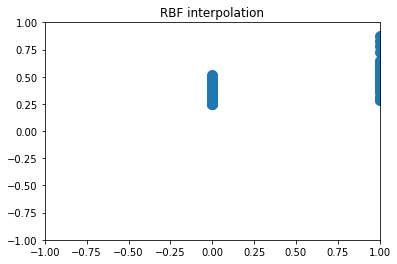

In [213]:
n = plt.Normalize(-1., 1.)
ti = np.linspace(-1.0, 1.0, 100)

plt.subplot(1, 1, 1)
plt.scatter(testlabel, lifeprob, 100, cmap=cm.jet)
plt.title('RBF interpolation')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()